#### 2011년 1월 ~ 2012년 12월
* 날짜,/시간, 기온, 습도, 풍속 등의 정보를 기반으로 1시간 간격 동안의 자전거 대여 횟수가 기재되어 있음<br>
* datetime: hourly date + timestamp  
* season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
* holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
* workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
* weather:  
    1 = 맑음, 약간 구름 낀 흐림  
    2 = 안개, 안개 + 흐림  
    3 = 가벼운 눈, 가벼운 비 + 천둥  
    4 = 심한 눈/비, 천둥/번개  
* temp: 온도(섭씨)   
* atemp: 체감온도(섭씨)  
* humidity: 상대습도  
* windspeed: 풍속  
* **casual: 사전에 등록되지 않는 사용자가 대여한 횟수**  
* **registered: 사전에 등록된 사용자가 대여한 횟수**  
* count: 대여 횟수

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

bike_df = pd.read_csv('data/bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [69]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [70]:
# Convert argument to datetime.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [71]:
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
print(bike_df.info())
bike_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [72]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

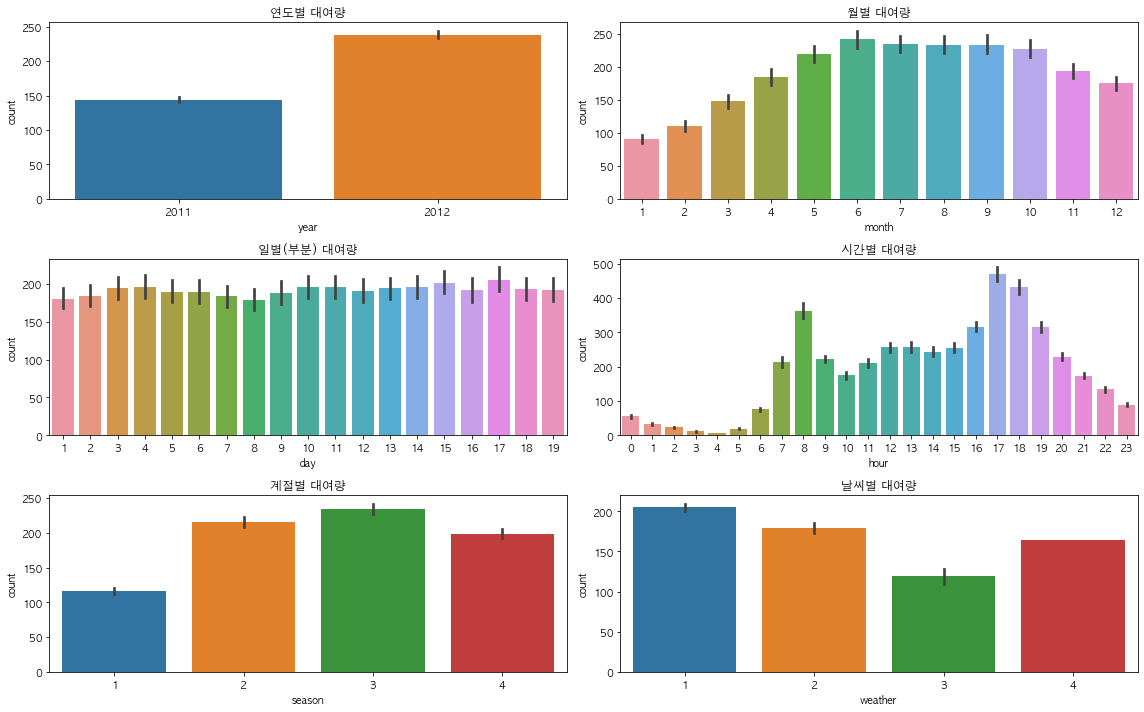

In [73]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(16,10)

sns.barplot(data=bike_df, x="year", y="count", ax=ax1)
sns.barplot(data=bike_df, x="month", y="count", ax=ax2)
sns.barplot(data=bike_df, x="day", y="count", ax=ax3)
sns.barplot(data=bike_df, x="hour", y="count", ax=ax4)
sns.barplot(data=bike_df, x="season", y="count", ax=ax5)
sns.barplot(data=bike_df, x="weather", y="count", ax=ax6)

ax1.set(title="연도별 대여량")
ax2.set(title="월별 대여량")
ax3.set(title="일별(부분) 대여량")
ax4.set(title="시간별 대여량")
ax5.set(title="계절별 대여량")
ax6.set(title="날씨별 대여량")
plt.tight_layout()

### 로그 변환, 피처 인코딩, 모델 학습/예측/평가 
* https://www.kaggle.com/c/bike-sharing-demand/overview/evaluation
* RMSLE(실제 값과 예측값의 오류를 로그로 변환한 뒤 RMSE를 적용)
* Score : RMSLE(Root Mean Squared Logarithmic Error), 과대평가된 항목보다 과소평가 된 항목에 페널티를 준다. 0에 가까울 수록 정밀도가 높다.

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# MSA : 실제 값과 예측 값의 차이를 절댓값으로 변환해 평균한 것
# MSE : 실제 값과 예측 값의 차이를 제곱해 평균한 것(제곱하면서 +로 변환)
# RMSE : MSE 값에 루트를 씌운 것
# RMSLE : RMSE에 log를 적용해 준 지표


# log 값 변환 시 NaN등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y) # log(0)이 되지 않게 +1을 해주는 기능
    log_pred = np.log1p(pred)
    squred_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squred_error))
    return rmsle

# scikit-learn의 mean_squered_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MSE는 scikit-learn의 mean_squred_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred) 
    print(f'RMSLE : {rmsle_val:.2f}, RMSE : {rmse_val:.2f}, MAE : {mae_val:.2f}')  

In [75]:
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [76]:
from cgi import test
from random import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, v_train, v_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, v_train)
pred = lr_reg.predict(X_test)

evaluate_regr(v_test, pred)


RMSLE : 1.16, RMSE : 140.90, MAE : 105.92


In [77]:
def get_top_error_data(y_test, pred, n_tops=5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교할 수 있도록
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(v_test, pred) # n_tops=5(default)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

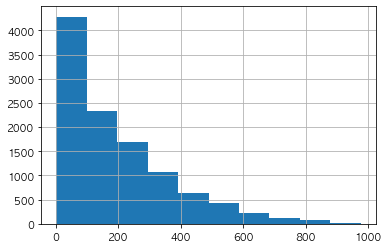

In [78]:
y_target.hist()

<AxesSubplot:>

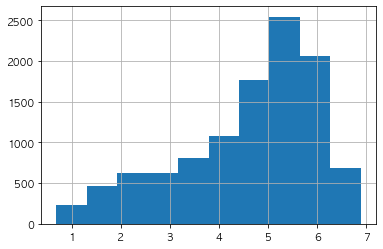

In [79]:
# 정규 분포는 아니지만 왜곡 정도가 조금 향상
# log의 근본적인 역할은 큰 수를 같은 비율의 작은 수로 바꿔 주는 것
# log를 취하는 순간 그 수는 지수가 되어버리니, 값이 작아 진다.
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [80]:
# 타겟 컬럼인 count 값을 log1p로 log 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, v_train, v_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, v_train)
pred = lr_reg.predict(X_test)

#테스트 데이터셋의 target 값은 log변환, exmp1을 이용해 원래 scale로 변환
y_test_exp = np.expm1(v_test)

# 예측 값도 log 변환된 타겟 기반으로 학습되어 예측 후 exmp1으로 scale 변환
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

# RMSLE : 1.165, RMSE : 140.900, MAE : 105.924(이전)

RMSLE : 1.02, RMSE : 162.59, MAE : 109.29


* RMSLE는 낮을수록 성능 향상, RMSE, MAE는 높을수록 성능이 향상되므로 약간의 성능향상은 있었다.

<AxesSubplot:>

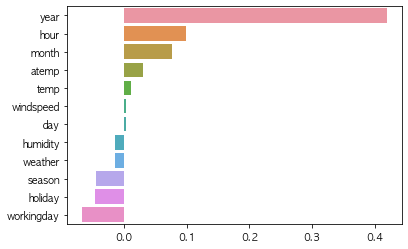

In [81]:
# coef_ = 모델의 학습한 계수
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [85]:
# Convert categorical variable into dummy/indicator variables.
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','hour','holiday','workingday','season',\
    'weather'])
X_features_ohe.head(3)

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0


In [84]:
X_train, X_test, v_train, v_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, v_train, v_test, is_expm1=False):
    model.fit(X_train, v_train)
    pred = model.predict(X_test)
    if is_expm1 :
        v_test = np.expm1(v_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(v_test, pred)

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, v_train, v_test, is_expm1=True)

### LinearRegression ###
RMSLE : 0.59, RMSE : 97.48, MAE : 63.11
### Ridge ###
RMSLE : 0.59, RMSE : 98.41, MAE : 63.65
### Lasso ###
RMSLE : 0.63, RMSE : 113.03, MAE : 72.66


#### 피처 인코딩 원-핫 인코딩을 적용
* 선형 회귀의 예측 성능이 많이 향상됨

<AxesSubplot:>

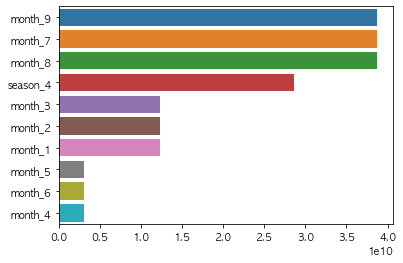

In [86]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [88]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GMB, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train, X_test, v_train, v_test, is_expm1=True)

### RandomForestRegressor ###
RMSLE : 0.35, RMSE : 50.74, MAE : 31.44
### XGBRegressor ###
RMSLE : 0.34, RMSE : 50.95, MAE : 30.89
### LGBMRegressor ###
RMSLE : 0.32, RMSE : 46.47, MAE : 28.78
